In [1]:
import numpy as np

# 加载数据
black_data = np.load('plot2_noisy_10/black_region_noisy.npy')  # 黑色区域
red_data = np.load('plot2_noisy_10/red_region_noisy.npy')      # 红色区域

# 提取坐标
black_x = black_data[0, :]
black_y = black_data[1, :]
red_x = red_data[0, :]
red_y = red_data[1, :]

# 创建特征数组 (x, y) 和标签数组 target
black_features = np.column_stack((black_x, black_y))  # 黑色特征
red_features = np.column_stack((red_x, red_y))       # 红色特征

black_target = np.zeros((black_features.shape[0],), dtype=int)  # 黑色标签：0
red_target = np.ones((red_features.shape[0],), dtype=int)       # 红色标签：1

# 合并特征和标签
features = np.vstack((black_features, red_features))  # 合并所有特征
targets = np.hstack((black_target, red_target))       # 合并所有标签

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features = features[indices]  # 按打乱后的索引重排特征
targets = targets[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('plot2_noisy_10/features.npy', features)  # 保存打乱的特征数组
np.save('plot2_noisy_10/targets.npy', targets)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features[:5])
print("前5个标签：", targets[:5])


打乱后的特征数组形状： (5500, 2)
打乱后的标签数组形状： (5500,)
前5个特征：
 [[ 0.27981065  0.8865355 ]
 [-0.85657882  0.71560751]
 [-0.4776092   0.39060584]
 [-0.06729931  0.65111943]
 [ 0.20657733 -0.97231958]]
前5个标签： [0 0 1 0 0]


In [2]:
import numpy as np

# 加载数据
black_data_test = np.load('plot2_noisy_10/black_region_noisy_test.npy')  # 黑色区域
red_data_test = np.load('plot2_noisy_10/red_region_noisy_test.npy')      # 红色区域

# 提取坐标
black_x_test = black_data_test[0, :]
black_y_test = black_data_test[1, :]
red_x_test = red_data_test[0, :]
red_y_test = red_data_test[1, :]

# 创建特征数组 (x, y) 和标签数组 target
black_features_test = np.column_stack((black_x_test, black_y_test))  # 黑色特征
red_features_test = np.column_stack((red_x_test, red_y_test))       # 红色特征

black_target_test = np.zeros((black_features_test.shape[0],), dtype=int)  # 黑色标签：0
red_target_test = np.ones((red_features_test.shape[0],), dtype=int)       # 红色标签：1

# 合并特征和标签
features_test = np.vstack((black_features_test, red_features_test))  # 合并所有特征
targets_test = np.hstack((black_target_test, red_target_test))       # 合并所有标签

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features_test.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features_test = features_test[indices]  # 按打乱后的索引重排特征
targets_test = targets_test[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('plot2_noisy_10/features_test.npy', features_test)  # 保存打乱的特征数组
np.save('plot2_noisy_10/targets_test.npy', targets_test)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features_test.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets_test.shape)   # (11000,)
print("前5个特征：\n", features_test[:5])
print("前5个标签：", targets_test[:5])


打乱后的特征数组形状： (550, 2)
打乱后的标签数组形状： (550,)
前5个特征：
 [[ 0.54370031  0.32566002]
 [ 0.88349431  0.62165929]
 [-0.92057657  0.55755268]
 [-0.88982801 -0.2943418 ]
 [-0.33258136 -0.09436347]]
前5个标签： [0 0 0 0 1]


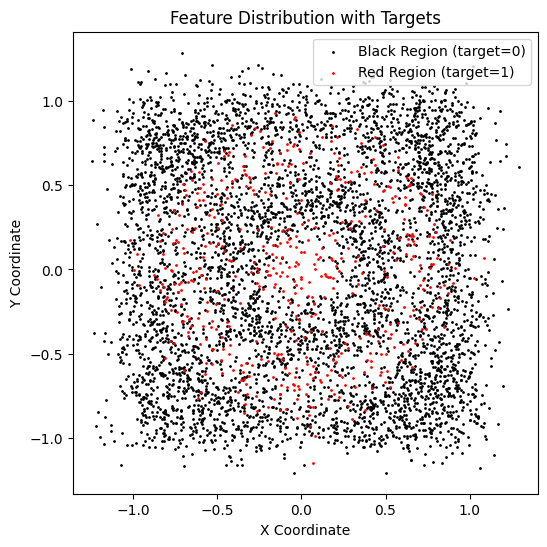

In [3]:
from imbens.metrics import *
from sklearn.metrics import *
from imbens.ensemble import *
from UADF import UncertaintyAwareDeepForest
from demo import get_config
import numpy as np
import matplotlib.pyplot as plt


X = np.load('plot2_noisy_10/features.npy')
y = np.load('plot2_noisy_10/targets.npy')

X_test = np.load('plot2_noisy_10/features_test.npy')
y_test = np.load('plot2_noisy_10/targets_test.npy')

# 绘制分布图，使用布尔索引直接分类
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='black', s=1, label='Black Region (target=0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=1, label='Red Region (target=1)')
plt.title("Feature Distribution with Targets")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.axis("equal")  # 保持坐标比例一致
plt.show()



Begin to train.... - 2024-12-14 21:05:46,425 - DualGranularBalancedDeepForest
the shape of training samples: (5500, 2) - 2024-12-14 21:05:46,426 - DualGranularBalancedDeepForest
use gmean as training evaluation - 2024-12-14 21:05:46,427 - DualGranularBalancedDeepForest
stacking: False, save model: False - 2024-12-14 21:05:46,427 - DualGranularBalancedDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2024-12-14 21:05:46,429 - DualGranularBalancedDeepForest
The shape of x_train is (5500, 2) - 2024-12-14 21:05:46,429 - DualGranularBalancedDeepForest


Training UncertaintyAwareDeepForest...


layer_0, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.8927, f1_score=0.5558, auc=0.7673, gmean=0.3412, sen=0.1200, spe=0.9700, aupr=0.2390 - 2024-12-14 21:05:49,384 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9000, f1_score=0.5860, auc=0.7750, gmean=0.3948, sen=0.1600, spe=0.9740, aupr=0.3022 - 2024-12-14 21:05:49,391 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9036, f1_score=0.5667, auc=0.7696, gmean=0.3433, sen=0.1200, spe=0.9820, aupr=0.2704 - 2024-12-14 21:05:49,399 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.8855, f1_score=0.5062, auc=0.6918, gmean=0.2201, sen=0.0500, spe=0.9690, aupr=0.1583 - 2024-12-14 21:05:49,406 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.8945, f1_score=0.5634, auc=0.7047, gmean=0.3553, sen=0.1300, spe=0.9710, aupr=0.2265 - 2024-12-14 21:05:49,416 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 0
num_layers: 1


layer_1, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.8809, f1_score=0.6017, auc=0.7315, gmean=0.4762, sen=0.2400, spe=0.9450, aupr=0.2820 - 2024-12-14 21:06:08,658 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.8900, f1_score=0.5899, auc=0.7474, gmean=0.4271, sen=0.1900, spe=0.9600, aupr=0.2859 - 2024-12-14 21:06:08,665 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.8945, f1_score=0.6179, auc=0.7065, gmean=0.4800, sen=0.2400, spe=0.9600, aupr=0.2993 - 2024-12-14 21:06:08,669 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.8709, f1_score=0.5704, auc=0.7260, gmean=0.4224, sen=0.1900, spe=0.9390, aupr=0.2576 - 2024-12-14 21:06:08,675 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9073, f1_score=0.6522, auc=0.7855, gmean=0.5212, sen=0.2800, spe=0.9700, aupr=0.4151 - 2024-12-14 21:06:08,682 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 1
num_layers: 2


layer_2, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9236, f1_score=0.7233, auc=0.8119, gmean=0.6248, sen=0.4000, spe=0.9760, aupr=0.5346 - 2024-12-14 21:06:25,796 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9273, f1_score=0.7394, auc=0.8483, gmean=0.6482, sen=0.4300, spe=0.9770, aupr=0.5396 - 2024-12-14 21:06:25,802 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9264, f1_score=0.7120, auc=0.8348, gmean=0.5869, sen=0.3500, spe=0.9840, aupr=0.5485 - 2024-12-14 21:06:25,807 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9191, f1_score=0.7051, auc=0.7899, gmean=0.6003, sen=0.3700, spe=0.9740, aupr=0.5075 - 2024-12-14 21:06:25,815 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9164, f1_score=0.6749, auc=0.7904, gmean=0.5417, sen=0.3000, spe=0.9780, aupr=0.4551 - 2024-12-14 21:06:25,820 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 2
num_layers: 3


layer_3, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9427, f1_score=0.7839, auc=0.8453, gmean=0.6821, sen=0.4700, spe=0.9900, aupr=0.6169 - 2024-12-14 21:06:43,546 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9455, f1_score=0.7854, auc=0.8401, gmean=0.6691, sen=0.4500, spe=0.9950, aupr=0.6241 - 2024-12-14 21:06:43,551 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9436, f1_score=0.7911, auc=0.8260, gmean=0.6961, sen=0.4900, spe=0.9890, aupr=0.6254 - 2024-12-14 21:06:43,556 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9509, f1_score=0.8279, auc=0.8734, gmean=0.7570, sen=0.5800, spe=0.9880, aupr=0.7088 - 2024-12-14 21:06:43,562 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9409, f1_score=0.7717, auc=0.7980, gmean=0.6603, sen=0.4400, spe=0.9910, aupr=0.5669 - 2024-12-14 21:06:43,566 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 3
num_layers: 4


layer_4, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9491, f1_score=0.8021, auc=0.8609, gmean=0.6914, sen=0.4800, spe=0.9960, aupr=0.6759 - 2024-12-14 21:07:02,324 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9555, f1_score=0.8377, auc=0.8845, gmean=0.7527, sen=0.5700, spe=0.9940, aupr=0.7148 - 2024-12-14 21:07:02,328 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9482, f1_score=0.7948, auc=0.8187, gmean=0.6772, sen=0.4600, spe=0.9970, aupr=0.6366 - 2024-12-14 21:07:02,335 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9655, f1_score=0.8814, auc=0.9357, gmean=0.8221, sen=0.6800, spe=0.9940, aupr=0.8280 - 2024-12-14 21:07:02,342 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9509, f1_score=0.8180, auc=0.8716, gmean=0.7255, sen=0.5300, spe=0.9930, aupr=0.6686 - 2024-12-14 21:07:02,347 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 4
num_layers: 5
last_layer_index 4
last_layer_index 4
UncertaintyAwareDeepForest - Accuracy: 0.9091
UncertaintyAwareDeepForest - AUC: 0.8418
UncertaintyAwareDeepForest - AUPR: 0.3752
UncertaintyAwareDeepForest - Sensitivity: 0.0200
UncertaintyAwareDeepForest - Specificity: 0.9980
UncertaintyAwareDeepForest - G-Mean: 0.1413
UncertaintyAwareDeepForest - F1 Macro: 0.4954


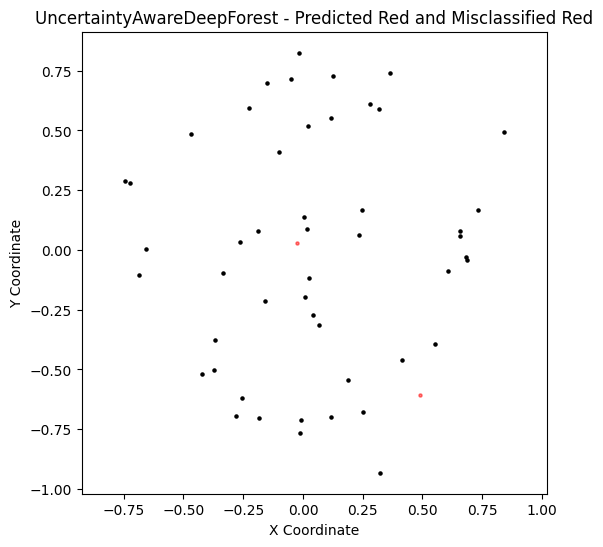

In [4]:
import os
# 配置输出文件夹
output_dir = "plot2_noisy_10"
os.makedirs(output_dir, exist_ok=True)

for method_name, model in {'UncertaintyAwareDeepForest': UncertaintyAwareDeepForest(get_config())}.items():
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制结果
    plt.figure(figsize=(6, 6))
    plt.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    plt.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    plt.title(f"{method_name} - Predicted Red and Misclassified Red")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis("equal")  # 保持坐标轴比例一致
    plt.show()


Training CatBoost...
CatBoost - Accuracy: 0.9091
CatBoost - AUC: 0.8515
CatBoost - AUPR: 0.3675
CatBoost - Sensitivity: 0.0000
CatBoost - Specificity: 1.0000
CatBoost - G-Mean: 0.0000
CatBoost - F1 Macro: 0.4762


TypeError: 'Axes' object is not subscriptable

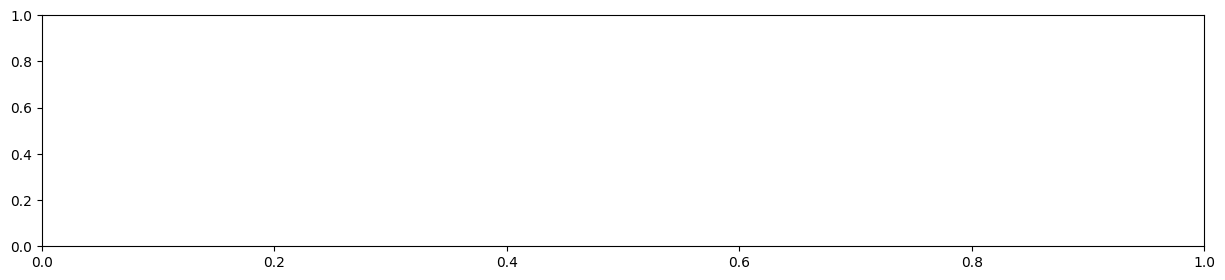

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import os
from catboost import CatBoostClassifier

# 配置输出文件夹
output_dir = "plot2_noisy_10"
os.makedirs(output_dir, exist_ok=True)

# 配置不平衡数据处理模型
ensemble_methods = {
    'BalanceCascade': BalanceCascadeClassifier(n_estimators=50),  # 设置生成50棵树
    'SelfPacedEnsemble': SelfPacedEnsembleClassifier(n_estimators=50),
    'UnderBagging': UnderBaggingClassifier(n_estimators=50),
    'EasyEnsemble': EasyEnsembleClassifier(n_estimators=50),
    'RUSBoost': RUSBoostClassifier(n_estimators=50),
    'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=50),
    'AdaCost': AdaCostClassifier(n_estimators=50),
    'AdaUBoost': AdaUBoostClassifier(n_estimators=50),
    'AsymBoost': AsymBoostClassifier(n_estimators=50),
    'CatBoost': CatBoostClassifier(n_estimators=50, verbose=0),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")

    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

    # 保存图像
    plt.savefig(os.path.join(output_dir, f"{method_name}_prediction.png"), dpi=300, bbox_inches='tight')

# 统一调整布局
plt.tight_layout()
plt.show()


Training OverBagging...
OverBagging - Accuracy: 0.9055
OverBagging - AUC: 0.8116
OverBagging - AUPR: 0.3576
OverBagging - Sensitivity: 0.2200
OverBagging - Specificity: 0.9740
OverBagging - G-Mean: 0.4629
OverBagging - F1 Macro: 0.6233
Training SMOTEBoost...
SMOTEBoost - Accuracy: 0.6327
SMOTEBoost - AUC: 0.8256
SMOTEBoost - AUPR: 0.3361
SMOTEBoost - Sensitivity: 0.8800
SMOTEBoost - Specificity: 0.6080
SMOTEBoost - G-Mean: 0.7315
SMOTEBoost - F1 Macro: 0.5270
Training OverBoost...
OverBoost - Accuracy: 0.6182
OverBoost - AUC: 0.8316
OverBoost - AUPR: 0.3279
OverBoost - Sensitivity: 0.9000
OverBoost - Specificity: 0.5900
OverBoost - G-Mean: 0.7287
OverBoost - F1 Macro: 0.5187
Training KmeansSMOTEBoost...
KmeansSMOTEBoost - Accuracy: 0.7218
KmeansSMOTEBoost - AUC: 0.7705
KmeansSMOTEBoost - AUPR: 0.3603
KmeansSMOTEBoost - Sensitivity: 0.5800
KmeansSMOTEBoost - Specificity: 0.7360
KmeansSMOTEBoost - G-Mean: 0.6534
KmeansSMOTEBoost - F1 Macro: 0.5514
Training SMOTEBagging...
SMOTEBagging - 

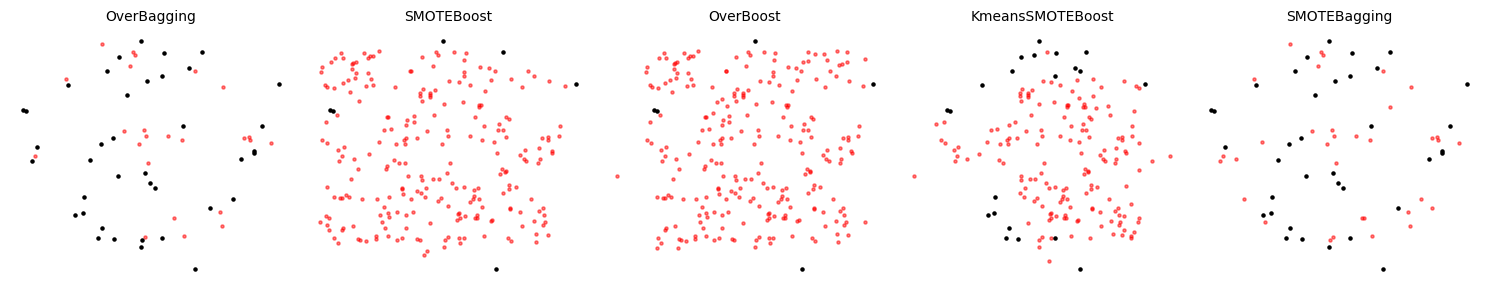

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os

# 配置输出文件夹
output_dir = "plot2_noisy_10"
os.makedirs(output_dir, exist_ok=True)
# 配置不平衡数据处理模型
ensemble_methods = {
    'OverBagging': OverBaggingClassifier(n_estimators=50),
    'SMOTEBoost': SMOTEBoostClassifier(n_estimators=50),
    'OverBoost': OverBoostClassifier(n_estimators=50),
    'KmeansSMOTEBoost': KmeansSMOTEBoostClassifier(n_estimators=50),
    'SMOTEBagging': SMOTEBaggingClassifier(n_estimators=50),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)
    
    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5, label="Misclassified")  # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

# 统一调整布局
plt.tight_layout()
plt.show()
